## 목차 단위로 글을 쓰게 만드려면?

In [3]:
from langgraph.graph import END, StateGraph
from typing import TypedDict


class DummyGraphState(TypedDict):
    """
    state to store results
    """

    result: str


class DummyNode(object):
    def run(self, state):
        return {
            **state
        }

def should_continue(state):
    return "end"

workflow = StateGraph(DummyGraphState)

# create TOC and parsing that
workflow.add_node("researcher", DummyNode().run)
workflow.add_node("writer_and_editor", DummyNode().run)
workflow.add_node("merger", DummyNode().run)

#
workflow.set_entry_point("researcher")
workflow.add_edge("researcher", "writer_and_editor")
workflow.add_conditional_edges(
    "writer_and_editor",
    should_continue,
    {
        "continue": "writer_and_editor",
        "end": "merger"
    }
)
workflow.add_edge("merger", END)


app = workflow.compile()

In [5]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp310-cp310-macosx_12_0_x86_64.whl size=92496 sha256=e1ea2f5cb7680b273ef8c6eb9bf0dee9fe605c53e7520747c88b50e00cc78946
  Stored in directory: /Users/y9yk/Library/Caches/pip/wheels/c5/96/10/6c25add1fffc368b1927252bf73b63fcb938de8f4486e23691
Successfully built pygraphviz

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


# 그래서 그려본 순서도는

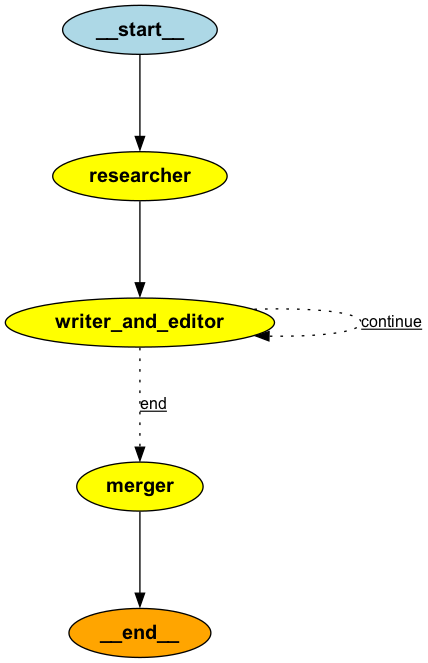

In [6]:
from IPython.display import Image

Image(app.get_graph().draw_png())